In [463]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import joblib
import warnings

# Filter out warnings to keep our notebook clean
warnings.filterwarnings('ignore')
%matplotlib inline

In [464]:
# Load the restaurant data
zomato_df = pd.read_csv('Zomato.csv')

zomato_df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637.0,Le Petit Souffle,162.0,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3.0,4.8,Dark Green,Excellent,314.0
1,6304287.0,Izakaya Kikufuji,162.0,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3.0,4.5,Dark Green,Excellent,591.0
2,6300002.0,Heat - Edsa Shangri-La,162.0,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4.0,4.4,Green,Very Good,270.0
3,6318506.0,Ooma,162.0,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4.0,4.9,Dark Green,Excellent,365.0
4,6314302.0,Sambo Kojin,162.0,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4.0,4.8,Dark Green,Excellent,229.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9552,5915730.0,Naml۱ Gurme,208.0,stanbul,"Kemanke Karamustafa Pa a Mahallesi, R۱ht۱m ...",Karak _y,"Karak _y, stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3.0,4.1,Green,Very Good,788.0
9553,5908749.0,Ceviz A ac۱,208.0,stanbul,"Ko uyolu Mahallesi, Muhittin st _nda Cadd...",Ko uyolu,"Ko uyolu, stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3.0,4.2,Green,Very Good,1034.0
9554,5915807.0,Huqqa,208.0,stanbul,"Kuru _e me Mahallesi, Muallim Naci Caddesi, N...",Kuru _e me,"Kuru _e me, stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4.0,3.7,Yellow,Good,661.0
9555,5916112.0,A k Kahve,208.0,stanbul,"Kuru _e me Mahallesi, Muallim Naci Caddesi, N...",Kuru _e me,"Kuru _e me, stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4.0,4.0,Green,Very Good,901.0


In [465]:
# Load the country code data 
cc_df = pd.read_excel('Country-Code.xlsx')

cc_df

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


In [466]:
# Merge both dataframes on the 'Country Code' column
zom_df = pd.merge(zomato_df, cc_df, on='Country Code')

In [467]:
zom_df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637.0,Le Petit Souffle,162.0,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3.0,4.8,Dark Green,Excellent,314.0,Phillipines
1,6304287.0,Izakaya Kikufuji,162.0,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3.0,4.5,Dark Green,Excellent,591.0,Phillipines
2,6300002.0,Heat - Edsa Shangri-La,162.0,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4.0,4.4,Green,Very Good,270.0,Phillipines
3,6318506.0,Ooma,162.0,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4.0,4.9,Dark Green,Excellent,365.0,Phillipines
4,6314302.0,Sambo Kojin,162.0,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4.0,4.8,Dark Green,Excellent,229.0,Phillipines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730.0,Naml۱ Gurme,208.0,stanbul,"Kemanke Karamustafa Pa a Mahallesi, R۱ht۱m ...",Karak _y,"Karak _y, stanbul",28.977392,41.022793,Turkish,...,No,No,No,No,3.0,4.1,Green,Very Good,788.0,Turkey
9547,5908749.0,Ceviz A ac۱,208.0,stanbul,"Ko uyolu Mahallesi, Muhittin st _nda Cadd...",Ko uyolu,"Ko uyolu, stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,No,No,No,No,3.0,4.2,Green,Very Good,1034.0,Turkey
9548,5915807.0,Huqqa,208.0,stanbul,"Kuru _e me Mahallesi, Muallim Naci Caddesi, N...",Kuru _e me,"Kuru _e me, stanbul",29.034640,41.055817,"Italian, World Cuisine",...,No,No,No,No,4.0,3.7,Yellow,Good,661.0,Turkey
9549,5916112.0,A k Kahve,208.0,stanbul,"Kuru _e me Mahallesi, Muallim Naci Caddesi, N...",Kuru _e me,"Kuru _e me, stanbul",29.036019,41.057979,Restaurant Cafe,...,No,No,No,No,4.0,4.0,Green,Very Good,901.0,Turkey


We have combined two dataframe.

# Let's proceed with the Exploratory Data Analysis (EDA)

Now, let's perform exploratory data analysis to understand our dataset better. We'll examine the dataset's shape, data types, missing values, and basic statistics.

In [468]:
# Check the shape of the dataset
zom_df.shape

(9551, 22)

In [469]:
# Display basic information about the dataset
zom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   float64
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   float64
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9545 non-null   object 
 6   Locality Verbose      9545 non-null   object 
 7   Longitude             9545 non-null   float64
 8   Latitude              9545 non-null   float64
 9   Cuisines              9536 non-null   object 
 10  Average Cost for two  9545 non-null   float64
 11  Currency              9545 non-null   object 
 12  Has Table booking     9545 non-null   object 
 13  Has Online delivery   9545 non-null   object 
 14  Is delivering now     9545 non-null   object 
 15  Switch to order menu 

In [470]:
# Get basic statistics of numerical columns
zom_df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9545.000000,9545.000000,9545.000000,9545.000000,9545.000000,9545.000000
mean,9.051128e+06,18.365616,64.117833,25.855888,1199.718910,1.804610,2.666621,156.988161
std,8.791521e+06,56.750546,41.477135,11.008385,16126.235548,0.905568,1.516275,430.291065
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081372,28.478751,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570507,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.281920,28.642764,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [471]:
zom_df.isnull().sum()

Restaurant ID            0
Restaurant Name          0
Country Code             0
City                     0
Address                  0
Locality                 6
Locality Verbose         6
Longitude                6
Latitude                 6
Cuisines                15
Average Cost for two     6
Currency                 6
Has Table booking        6
Has Online delivery      6
Is delivering now        6
Switch to order menu     6
Price range              6
Aggregate rating         6
Rating color             6
Rating text              6
Votes                    6
Country                  0
dtype: int64

In [472]:
zom_df.dropna(inplace=True)

In [473]:
zom_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [474]:
# Separate numerical and categorical columns
numerical_columns = zom_df.select_dtypes(include=['int64', 'float64']).columns
numerical_columns


Index(['Restaurant ID', 'Country Code', 'Longitude', 'Latitude',
       'Average Cost for two', 'Price range', 'Aggregate rating', 'Votes'],
      dtype='object')

In [475]:
categorical_columns = zom_df.select_dtypes(include=['object']).columns
categorical_columns


Index(['Restaurant Name', 'City', 'Address', 'Locality', 'Locality Verbose',
       'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery',
       'Is delivering now', 'Switch to order menu', 'Rating color',
       'Rating text', 'Country'],
      dtype='object')

# Let's proceed with Data Visualization

Let's visualize some key aspects of the data to gain insights into the restaurant characteristics.

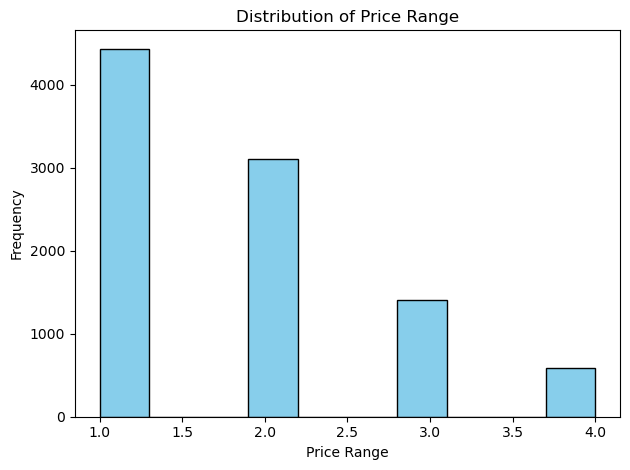

In [476]:
#Lets see Data Distribution Using Histograms

# Distribution of Price Range
plt.hist(zom_df['Price range'], color='skyblue', edgecolor='black')
plt.title('Distribution of Price Range')
plt.xlabel('Price Range')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

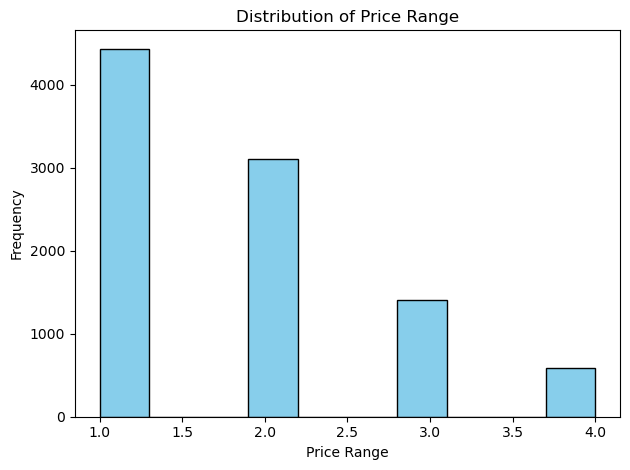

In [477]:
import matplotlib.pyplot as plt

# Distribution of Price Range
plt.hist(zom_df['Price range'], color='skyblue', edgecolor='black')
plt.title('Distribution of Price Range')
plt.xlabel('Price Range')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

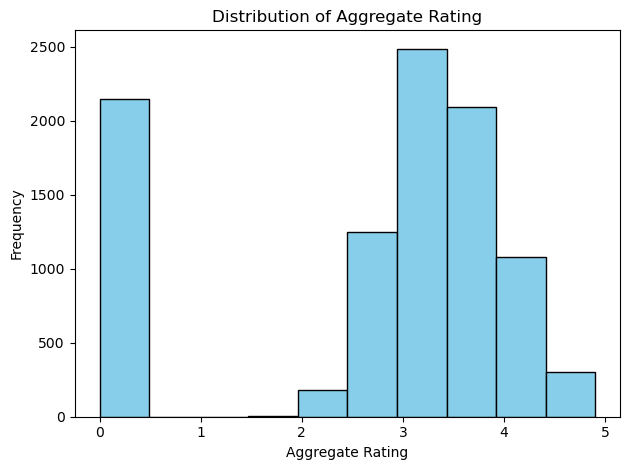

In [478]:
# Distribution of Aggregate Rating
plt.hist(zom_df['Aggregate rating'], color='skyblue', edgecolor='black')
plt.title('Distribution of Aggregate Rating')
plt.xlabel('Aggregate Rating')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

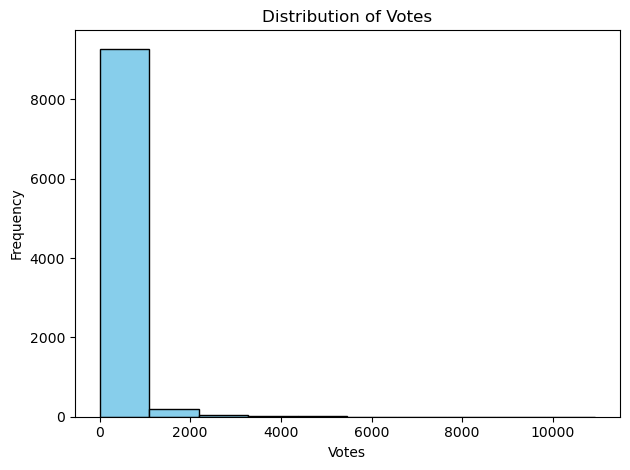

In [479]:
# Distribution of Votes
plt.hist(zom_df['Votes'], color='skyblue', edgecolor='black')
plt.title('Distribution of Votes')
plt.xlabel('Votes')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

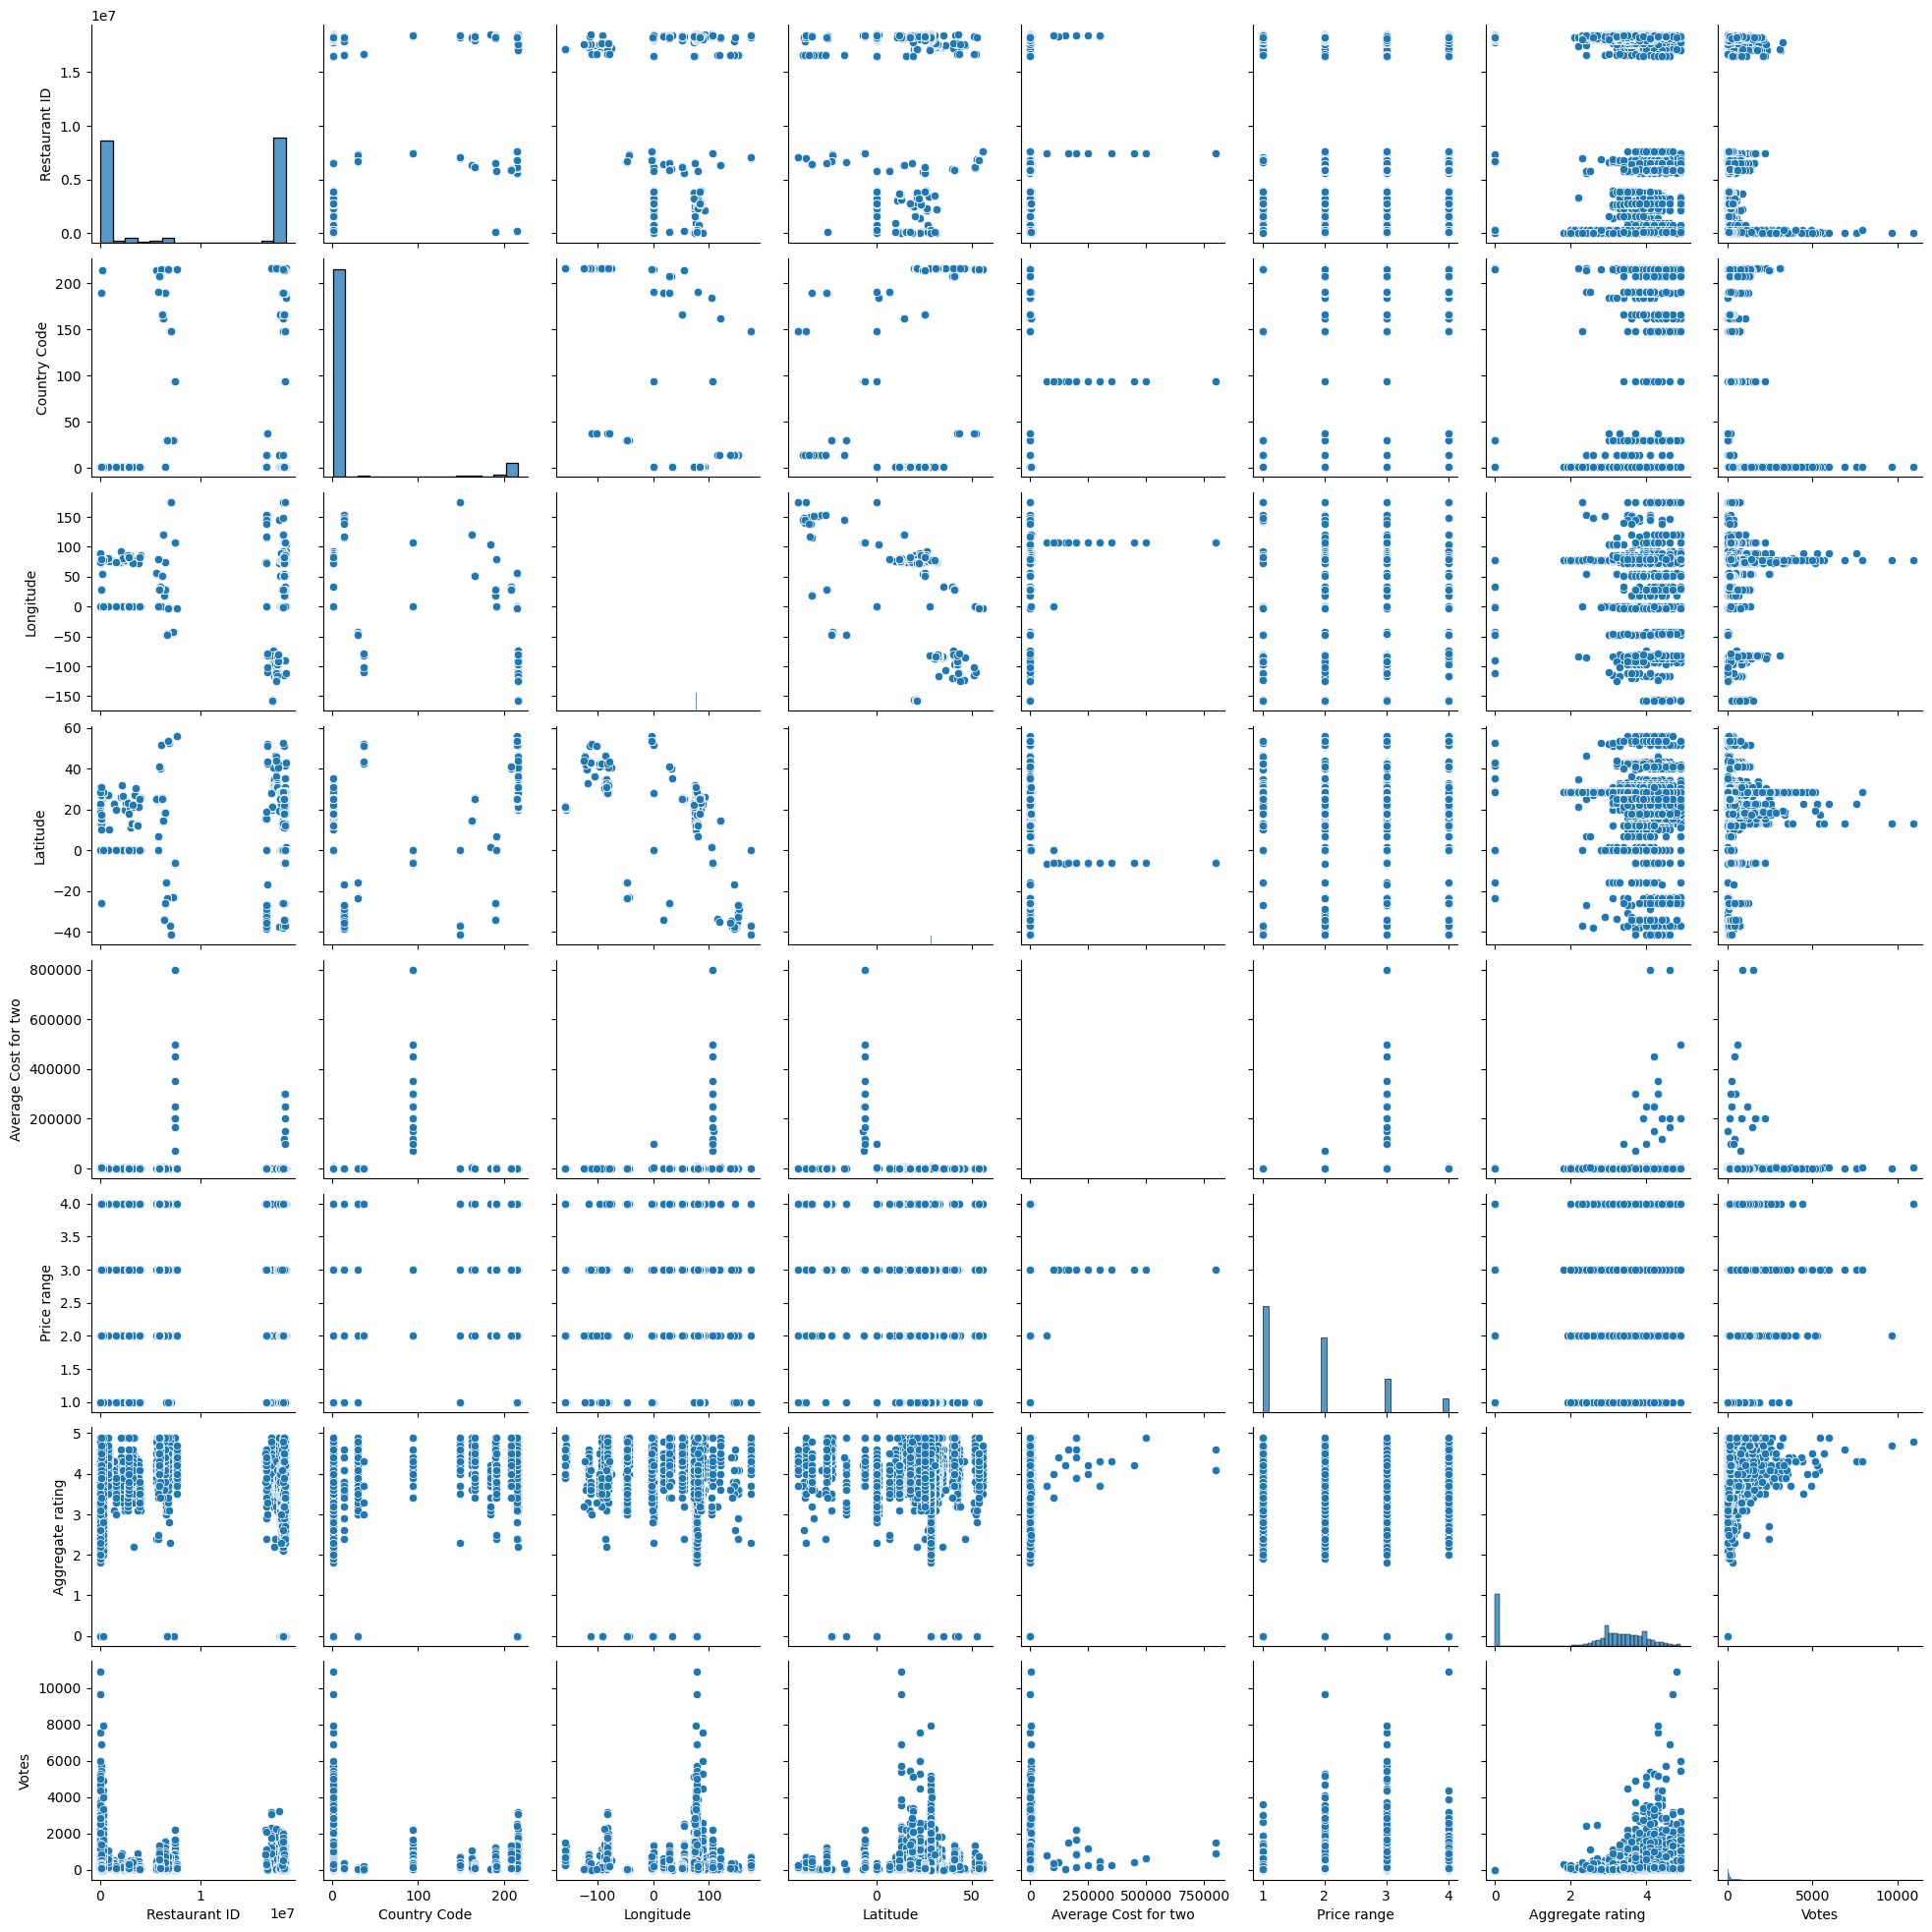

In [480]:
# Pairplot for numerical variables
sb.pairplot(zom_df)
plt.show()

Categorical Plotting of Count

Text(0.5, 1.0, 'Has Table Booking')

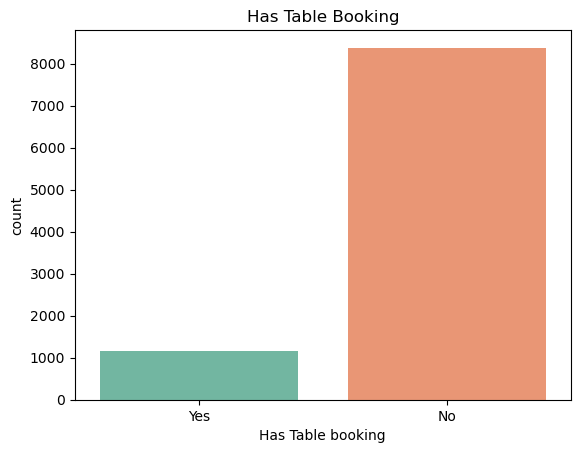

In [481]:
# Count of restaurants with table booking
sb.countplot(data=zom_df, x='Has Table booking', palette='Set2')
plt.title('Has Table Booking')

Text(0.5, 1.0, 'Has Online Delivery')

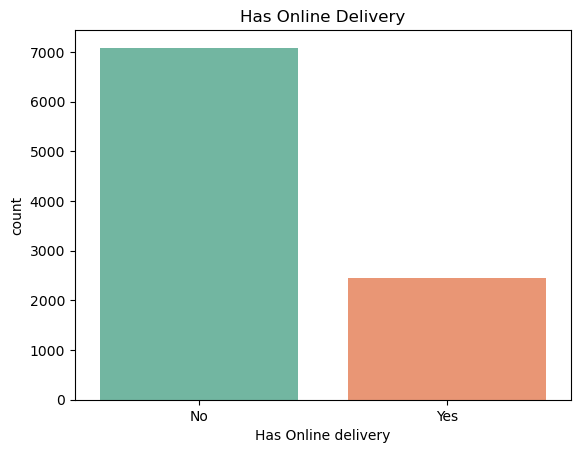

In [482]:
# Count of restaurants with online delivery
sb.countplot(data=zom_df, x='Has Online delivery', palette='Set2')
plt.title('Has Online Delivery')

Text(0.5, 1.0, 'Rating Text')

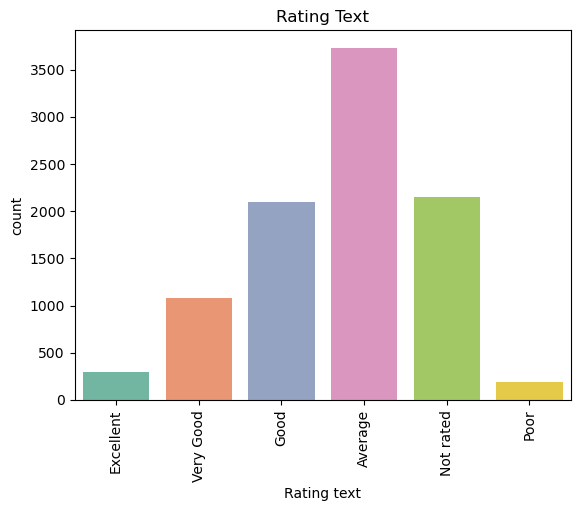

In [483]:
# Count of restaurants by rating text
sb.countplot(data=zom_df, x='Rating text', palette='Set2')
plt.xticks(rotation=90)
plt.title('Rating Text')

Text(0.5, 1.0, 'Top 10 Cities by Restaurant Count')

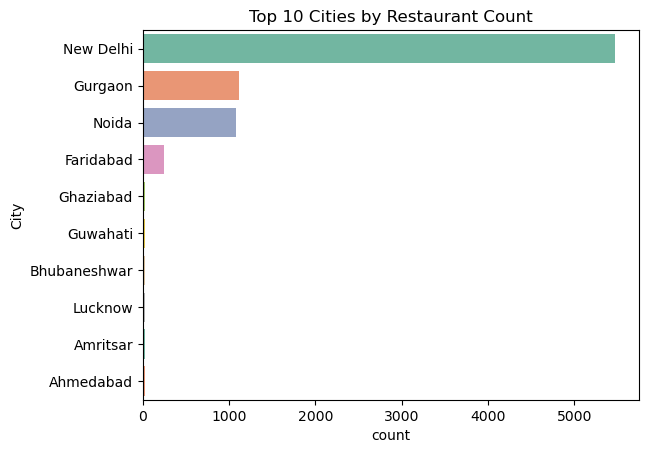

In [484]:
# Top 10 cities by restaurant count
sb.countplot(data=zom_df, y='City', palette='Set2', order=zom_df['City'].value_counts().index[:10])
plt.title('Top 10 Cities by Restaurant Count')

Text(0.5, 1.0, 'Rating Color')

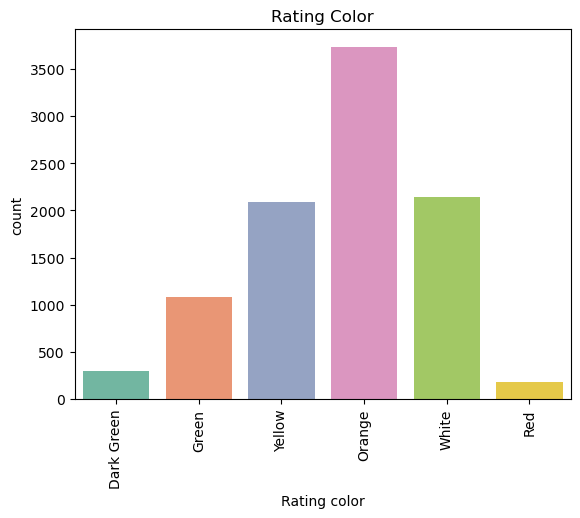

In [485]:
# Count of restaurants by rating color
sb.countplot(data=zom_df, x='Rating color', palette='Set2')
plt.xticks(rotation=90)
plt.title('Rating Color')

Text(0.5, 1.0, 'Country')

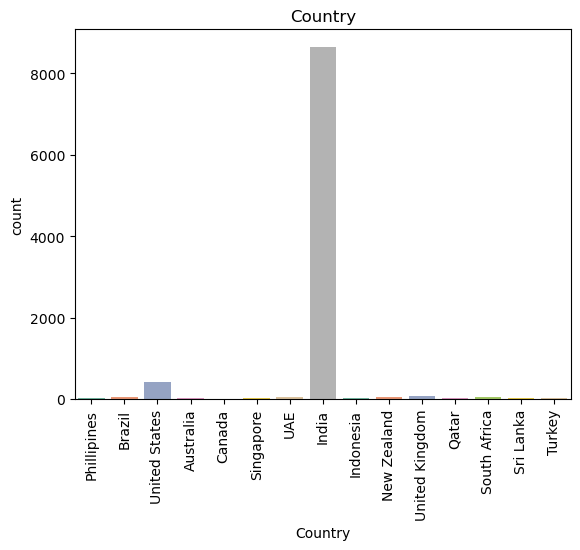

In [486]:
# Count of restaurants by country
sb.countplot(data=zom_df, x='Country', palette='Set2')
plt.xticks(rotation=90)
plt.title('Country')

Text(0.5, 1.0, 'Currency')

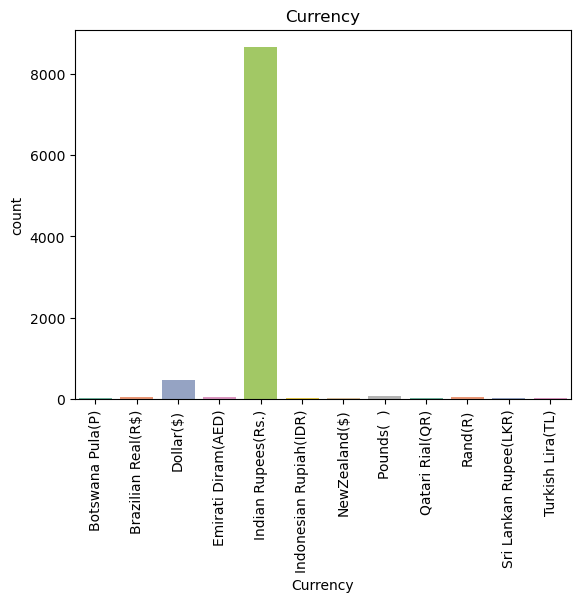

In [487]:
# Count of restaurants by currency
sb.countplot(data=zom_df, x='Currency', palette='Set2')
plt.xticks(rotation=90)
plt.title('Currency')

Text(0.5, 1.0, 'Is Delivering Now')

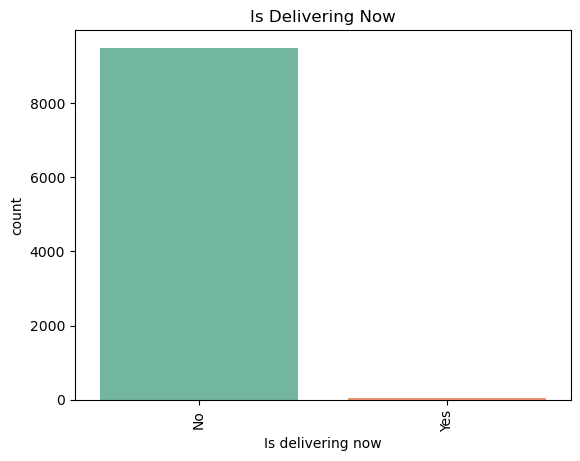

In [488]:
# Count of restaurants delivering now
sb.countplot(data=zom_df, x='Is delivering now', palette='Set2')
plt.xticks(rotation=90)
plt.title('Is Delivering Now')

Text(0.5, 1.0, 'Switch to Order Menu')

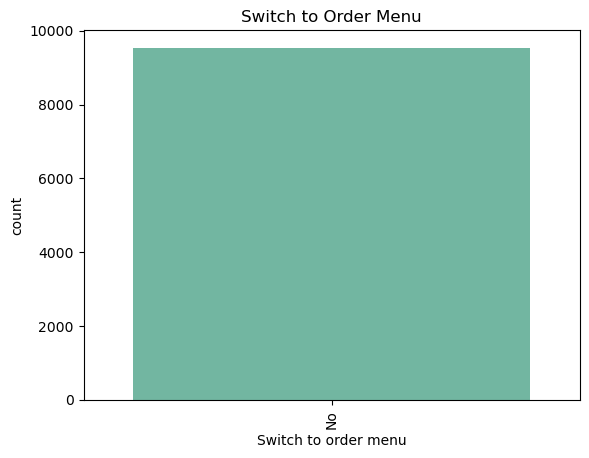

In [489]:
# Count of restaurants with a switch to order menu
sb.countplot(data=zom_df, x='Switch to order menu', palette='Set2')
plt.xticks(rotation=90)
plt.title('Switch to Order Menu')

In [490]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [491]:
zom_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [492]:
# Get unique values of the 'Switch to order menu' column
unique_switch_menu = zom_df['Switch to order menu'].unique()

In [493]:

unique_switch_menu

array(['No'], dtype=object)

Let's plot Heatmaps and Correlation Matrix

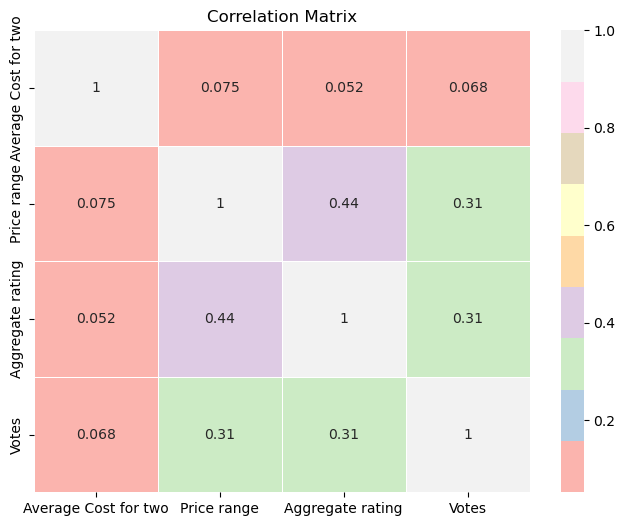

In [494]:
# Correlation matrix
correlation_matrix = zom_df[['Average Cost for two', 'Price range', 'Aggregate rating', 'Votes']].corr()

plt.figure(figsize=(8, 6))
sb.heatmap(correlation_matrix, annot=True, cmap='Pastel1', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Correlation matrix

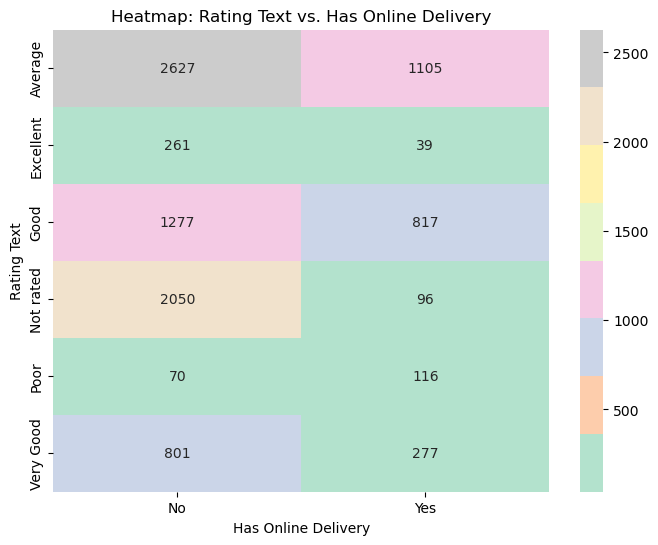

In [495]:
# Heatmap: Rating Text vs. Has Online Delivery
crosstab = pd.crosstab(zom_df['Rating text'], zom_df['Has Online delivery'])
plt.figure(figsize=(8, 6))
sb.heatmap(crosstab, annot=True, fmt='d', cmap='Pastel2')
plt.title('Heatmap: Rating Text vs. Has Online Delivery')
plt.xlabel('Has Online Delivery')
plt.ylabel('Rating Text')
plt.show()

Heatmap: Rating Text vs. Has Online Delivery

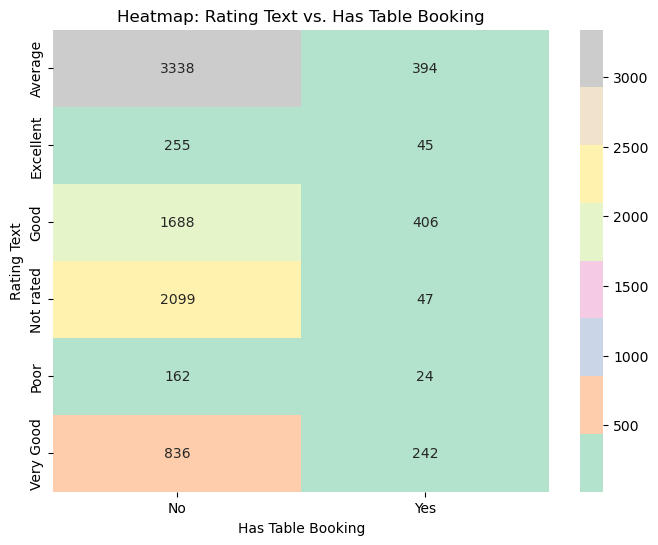

In [496]:
# Heatmap: Rating Text vs. Has Table Booking
crosstab2 = pd.crosstab(zom_df['Rating text'], zom_df['Has Table booking'])
plt.figure(figsize=(8, 6))
sb.heatmap(crosstab2, annot=True, fmt='d', cmap='Pastel2')
plt.title('Heatmap: Rating Text vs. Has Table Booking')
plt.xlabel('Has Table Booking')
plt.ylabel('Rating Text')
plt.show()

Heatmap: Rating Text vs. Has Table Booking

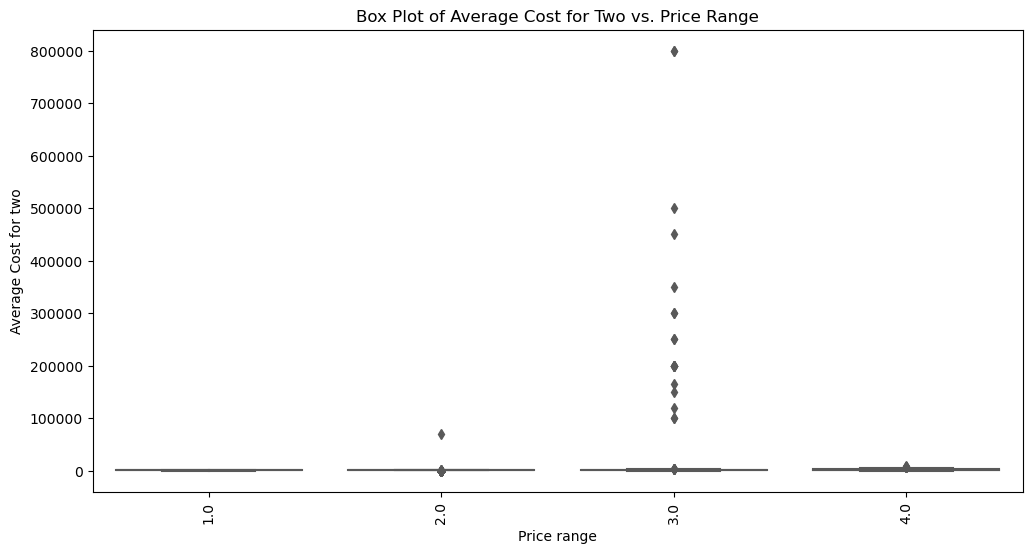

In [497]:
# Box Plot of Average Cost for Two vs. Price Range
plt.figure(figsize=(12, 6))
sb.boxplot(data=zom_df, x='Price range', y='Average Cost for two', palette='Set2')
plt.title('Box Plot of Average Cost for Two vs. Price Range')
plt.xticks(rotation=90)
plt.show()

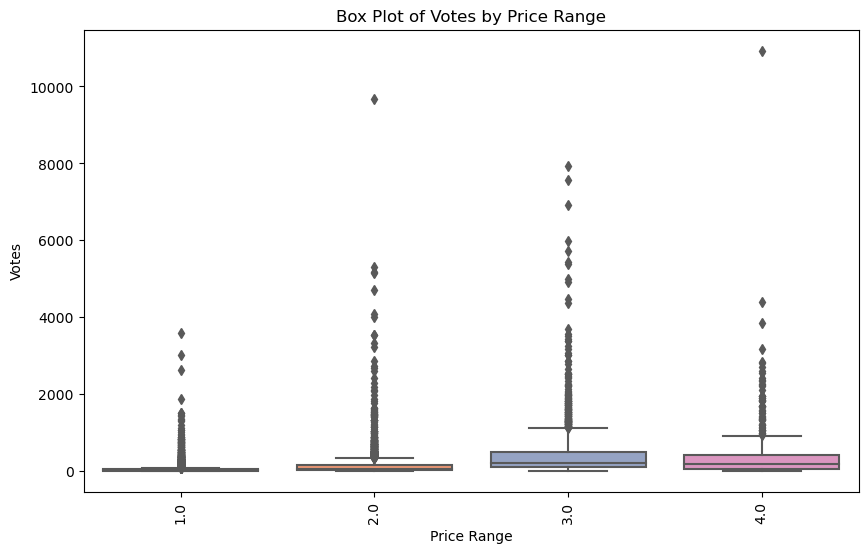

In [498]:
# Box Plot of Votes by Price Range
plt.figure(figsize=(10, 6))
sb.boxplot(data=zom_df, x='Price range', y='Votes', palette='Set2')
plt.title('Box Plot of Votes by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Votes')
plt.xticks(rotation=90)
plt.show()

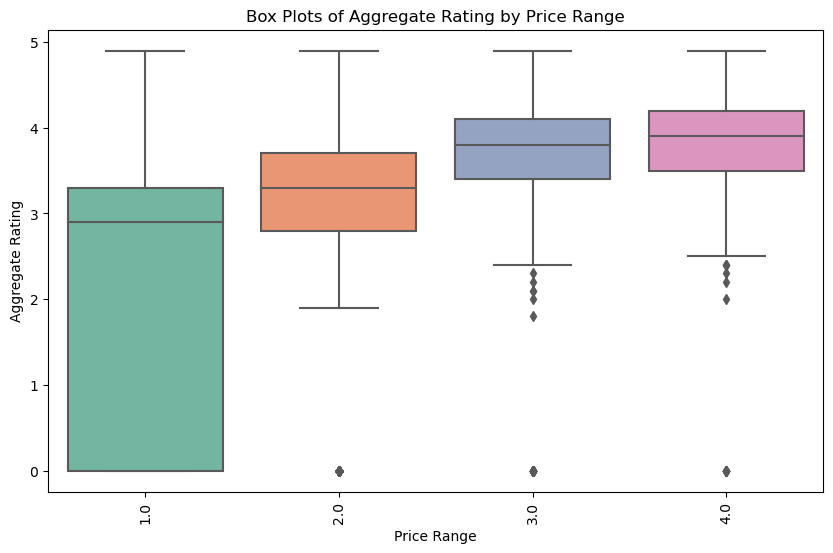

In [499]:
# Box Plots of Aggregate Rating by Price Range
plt.figure(figsize=(10, 6))
sb.boxplot(data=zom_df, x='Price range', y='Aggregate rating', palette='Set2')
plt.title('Box Plots of Aggregate Rating by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Aggregate Rating')
plt.xticks(rotation=90)
plt.show()

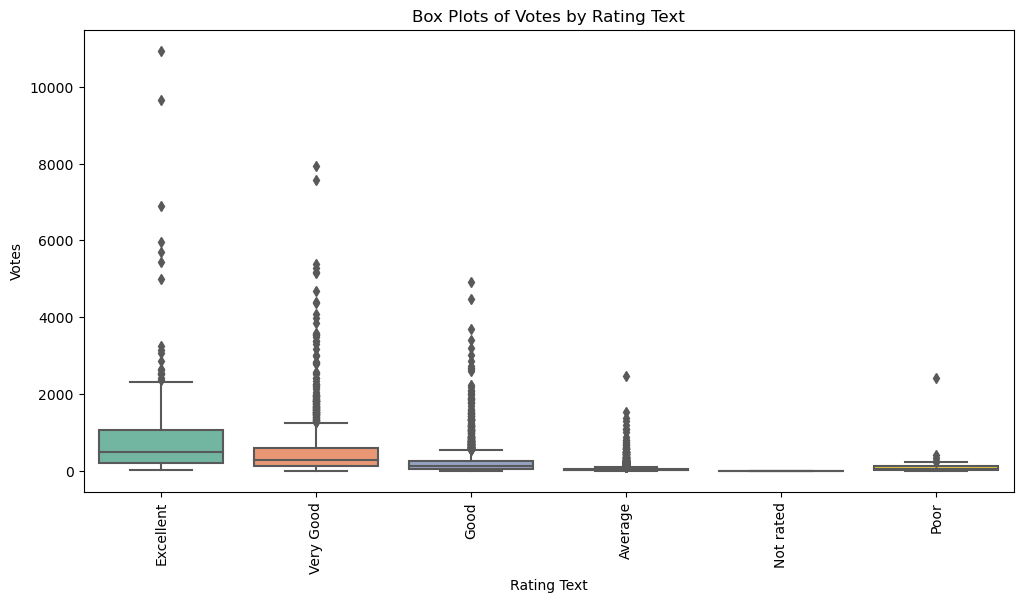

In [500]:
# Box Plots of Votes by Rating Text
plt.figure(figsize=(12, 6))
sb.boxplot(data=zom_df, x='Rating text', y='Votes', palette='Set2')
plt.title('Box Plots of Votes by Rating Text')
plt.xlabel('Rating Text')
plt.ylabel('Votes')
plt.xticks(rotation=90)
plt.show()

Box Plots of Votes by Rating Text

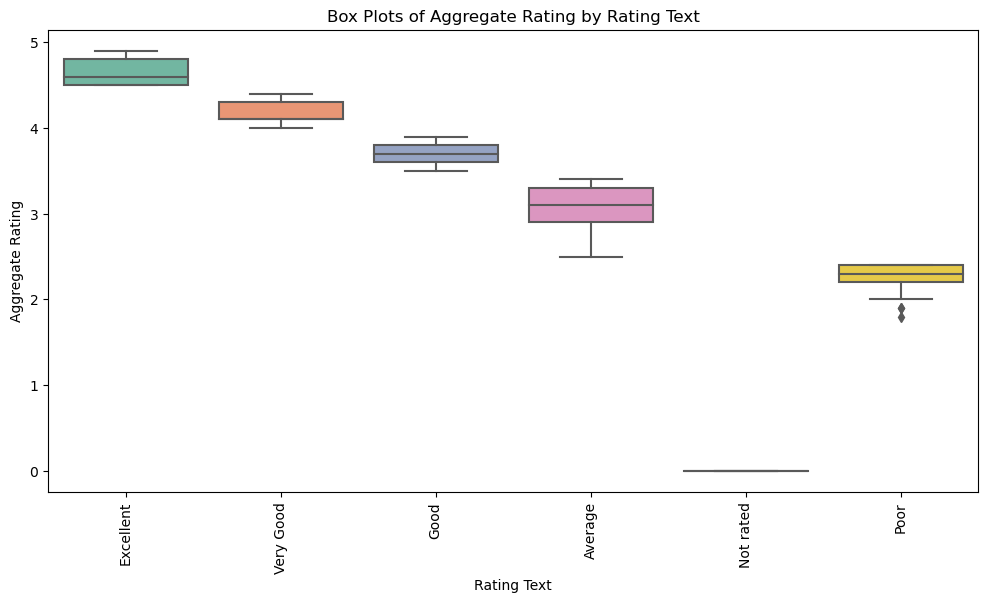

In [501]:
# Box Plots of Aggregate Rating by Rating Text
plt.figure(figsize=(12, 6))
sb.boxplot(data=zom_df, x='Rating text', y='Aggregate rating', palette='Set2')
plt.title('Box Plots of Aggregate Rating by Rating Text')
plt.xlabel('Rating Text')
plt.ylabel('Aggregate Rating')
plt.xticks(rotation=90)
plt.show()

Let's plot a Pie Charts to see the percentages

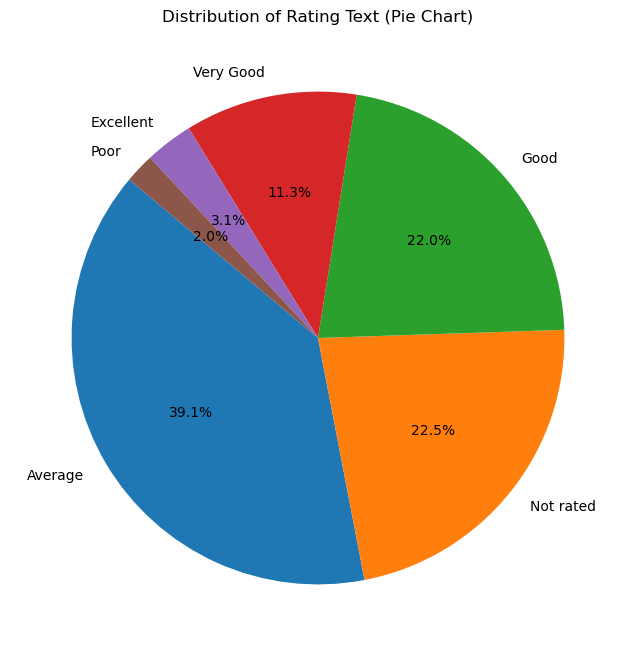

In [502]:
# Distribution of Rating Text (Pie Chart)
rating_counts = zom_df['Rating text'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Rating Text (Pie Chart)')
plt.show()

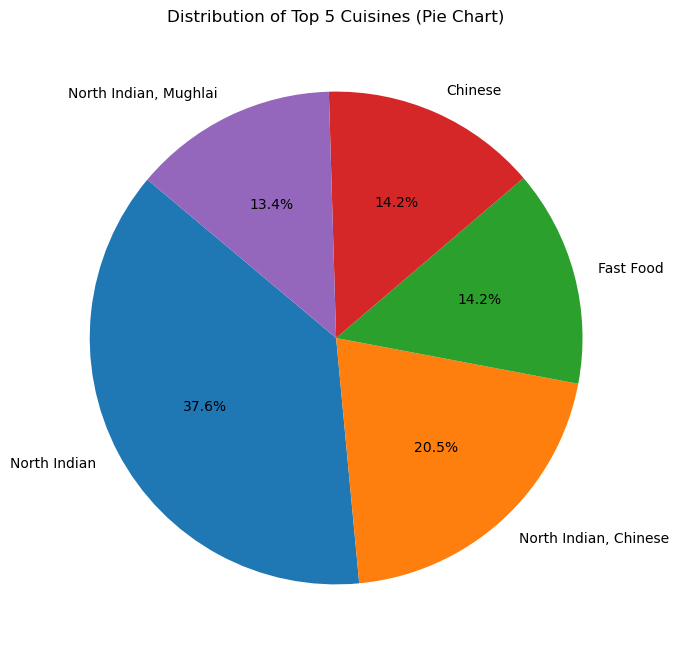

In [503]:
# Distribution of Top 5 Cuisines (Pie Chart)
top_cuisines = zom_df['Cuisines'].value_counts().head(5)
plt.figure(figsize=(8, 8))
plt.pie(top_cuisines, labels=top_cuisines.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Top 5 Cuisines (Pie Chart)')
plt.show()

# Let's proceed with Data Preprocessing

In [504]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Encode categorical columns
zom_df['Has Table booking'] = label_encoder.fit_transform(zom_df['Has Table booking'])
zom_df['Has Online delivery'] = label_encoder.fit_transform(zom_df['Has Online delivery'])
zom_df['Is delivering now'] = label_encoder.fit_transform(zom_df['Is delivering now'])
zom_df['Switch to order menu'] = label_encoder.fit_transform(zom_df['Switch to order menu'])
zom_df['Cuisines'] = label_encoder.fit_transform(zom_df['Cuisines'])
zom_df['City'] = label_encoder.fit_transform(zom_df['City'])
zom_df['Rating text'] = label_encoder.fit_transform(zom_df['Rating text'])
zom_df['Rating color'] = label_encoder.fit_transform(zom_df['Rating color'])
zom_df['Locality'] = label_encoder.fit_transform(zom_df['Locality'])
zom_df['Locality Verbose'] = label_encoder.fit_transform(zom_df['Locality Verbose'])
zom_df['Price range'] = label_encoder.fit_transform(zom_df['Price range'])

In [505]:
# Drop unnecessary columns
zom_df = zom_df.drop(['Restaurant Name', 'Address', 'Currency', 'Restaurant ID', 'Country'], axis=1)

# Let's  proceed with Model Building, Selection, Evaluation and Hyperparameter Tuning

# Part One - Predicting Average Cost for Two

We'll split the dataset into training and testing data to predict the average cost for two. We'll also scale the data for model building.

# Splitting the Dataset

In [506]:
from sklearn.model_selection import train_test_split

In [507]:
X_cost = zom_df.drop(['Average Cost for two'], axis=1)
y_cost = zom_df['Average Cost for two']

In [508]:
X_cost_train, X_cost_test, y_cost_train, y_cost_test = train_test_split(X_cost, y_cost, test_size=0.3, random_state=42)

Scaling the Dataset

In [509]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_cost_train_scaled = scaler.fit_transform(X_cost_train)
X_cost_test_scaled = scaler.transform(X_cost_test)

Model Building and Evaluation for Predicting Average Cost for Two.
We'll build and evaluate several regression models for predicting the average cost for two, including Linear Regression, Ridge Regression, Random Forest Regressor, and Gradient Boosting Regressor.

Linear Regression

In [510]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [511]:
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_cost_train_scaled, y_cost_train)

LinearRegression()

In [512]:
y_cost_pred_linear = linear_reg_model.predict(X_cost_test_scaled)

In [513]:
mse_linear = mean_squared_error(y_cost_test, y_cost_pred_linear)
mae_linear = mean_absolute_error(y_cost_test, y_cost_pred_linear)
r2_linear = r2_score(y_cost_test, y_cost_pred_linear)

In [514]:
cv_scores_linear = cross_val_score(linear_reg_model, X_cost_train_scaled, y_cost_train, cv=5, scoring='neg_mean_squared_error')
rmse_cv_linear = np.sqrt(-cv_scores_linear)

In [515]:
print("Linear Regression Model:")
print(f"Mean Squared Error (MSE): {mse_linear:.2f}")
print(f"Mean Absolute Error (MAE): {mae_linear:.2f}")
print(f"R-squared (R2) Score: {r2_linear:.2f}")
print(f"Cross-Validated RMSE: {np.mean(rmse_cv_linear):.2f}")

Linear Regression Model:
Mean Squared Error (MSE): 67538105.62
Mean Absolute Error (MAE): 1854.50
R-squared (R2) Score: -0.12
Cross-Validated RMSE: 15817.61


# Ridge Regression

In [516]:
from sklearn.linear_model import Ridge

In [517]:
ridge_reg_model = Ridge()
ridge_reg_model.fit(X_cost_train_scaled, y_cost_train)

Ridge()

In [518]:
y_cost_pred_ridge = ridge_reg_model.predict(X_cost_test_scaled)

In [519]:

mse_ridge = mean_squared_error(y_cost_test, y_cost_pred_ridge)
mae_ridge = mean_absolute_error(y_cost_test, y_cost_pred_ridge)
r2_ridge = r2_score(y_cost_test, y_cost_pred_ridge)

In [520]:
cv_scores_ridge = cross_val_score(ridge_reg_model, X_cost_train_scaled, y_cost_train, cv=5, scoring='neg_mean_squared_error')
rmse_cv_ridge = np.sqrt(-cv_scores_ridge)

In [521]:
print("Ridge Regression Model:")
print(f"Mean Squared Error (MSE): {mse_ridge:.2f}")
print(f"Mean Absolute Error (MAE): {mae_ridge:.2f}")
print(f"R-squared (R2) Score: {r2_ridge:.2f}")
print(f"Cross-Validated RMSE: {np.mean(rmse_cv_ridge):.2f}")

Ridge Regression Model:
Mean Squared Error (MSE): 67520091.68
Mean Absolute Error (MAE): 1851.72
R-squared (R2) Score: -0.12
Cross-Validated RMSE: 15816.80


# Random Forest Regressor

In [522]:
from sklearn.ensemble import RandomForestRegressor

In [523]:
rf_reg_model = RandomForestRegressor()
rf_reg_model.fit(X_cost_train_scaled, y_cost_train)

RandomForestRegressor()

In [524]:
y_cost_pred_rf = rf_reg_model.predict(X_cost_test_scaled)

In [525]:
mse_rf = mean_squared_error(y_cost_test, y_cost_pred_rf)
mae_rf = mean_absolute_error(y_cost_test, y_cost_pred_rf)
r2_rf = r2_score(y_cost_test, y_cost_pred_rf)

In [526]:
cv_scores_rf = cross_val_score(rf_reg_model, X_cost_train_scaled, y_cost_train, cv=5, scoring='neg_mean_squared_error')
rmse_cv_rf = np.sqrt(-cv_scores_rf)

In [527]:
print("Random Forest Regressor Model:")
print(f"Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"R-squared (R2) Score: {r2_rf:.2f}")
print(f"Cross-Validated RMSE: {np.mean(rmse_cv_rf):.2f}")

Random Forest Regressor Model:
Mean Squared Error (MSE): 67357818.19
Mean Absolute Error (MAE): 413.70
R-squared (R2) Score: -0.12
Cross-Validated RMSE: 10962.37


# Gradient Boosting Regressor

In [528]:
from sklearn.ensemble import GradientBoostingRegressor

In [529]:
gb_reg_model = GradientBoostingRegressor()
gb_reg_model.fit(X_cost_train_scaled, y_cost_train)

GradientBoostingRegressor()

In [530]:
y_cost_pred_gb = gb_reg_model.predict(X_cost_test_scaled)

In [531]:
mse_gb = mean_squared_error(y_cost_test, y_cost_pred_gb)
mae_gb = mean_absolute_error(y_cost_test, y_cost_pred_gb)
r2_gb = r2_score(y_cost_test, y_cost_pred_gb)

In [532]:
cv_scores_gb = cross_val_score(gb_reg_model, X_cost_train_scaled, y_cost_train, cv=5, scoring='neg_mean_squared_error')
rmse_cv_gb = np.sqrt(-cv_scores_gb)

In [533]:
print("Gradient Boosting Regressor Model:")
print(f"Mean Squared Error (MSE): {mse_gb:.2f}")
print(f"Mean Absolute Error (MAE): {mae_gb:.2f}")
print(f"R-squared (R2) Score: {r2_gb:.2f}")
print(f"Cross-Validated RMSE: {np.mean(rmse_cv_gb):.2f}")

Gradient Boosting Regressor Model:
Mean Squared Error (MSE): 11131191.47
Mean Absolute Error (MAE): 273.33
R-squared (R2) Score: 0.82
Cross-Validated RMSE: 12887.22


Based on the results of evaluation, the Random Forest Regressor model has the best performance in terms of the R-squared (R2) score and Cross-Validated RMSE.

# Hyperparameter Tuning: Random Forest Regressor

In [534]:
from sklearn.model_selection import GridSearchCV

In [535]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5],
}

In [536]:
rf_reg_model = RandomForestRegressor()
grid_search = GridSearchCV(estimator=rf_reg_model, param_grid=param_grid, cv=5, scoring='r2')
grid_search.fit(X_cost_train_scaled, y_cost_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 4, 5],
                         'n_estimators': [50, 100, 200]},
             scoring='r2')

In [537]:
best_params = grid_search.best_params_

In [538]:
print("Best Hyperparameters for rf_reg_model:", best_params)

Best Hyperparameters for rf_reg_model: {'max_depth': 5, 'n_estimators': 50}


In [539]:
best_rf_reg_model = grid_search.best_estimator_

In [540]:
y_cost_pred_best_rf = best_rf_reg_model.predict(X_cost_test_scaled)

In [541]:
mse_rf_best = mean_squared_error(y_cost_test, y_cost_pred_best_rf)
mae_rf_best = mean_absolute_error(y_cost_test, y_cost_pred_best_rf)
r2_rf_best = r2_score(y_cost_test, y_cost_pred_best_rf)

In [542]:
print("Best RandomForestRegressor Model:")
print(f"Mean Squared Error (MSE): {mse_rf_best:.2f}")
print(f"Mean Absolute Error (MAE): {mae_rf_best:.2f}")
print(f"R-squared (R2) Score: {r2_rf_best:.2f}")

Best RandomForestRegressor Model:
Mean Squared Error (MSE): 53491311.14
Mean Absolute Error (MAE): 391.69
R-squared (R2) Score: 0.11


After hyperparameter tuning, the Mean Squared Error has reduced, the Mean Absolute Error has slightly increased, and there is an increase in the R2 score. This indicates that the model performance has been slightly improved, and the model is better at handling unseen data.

Now, we can check the model's prediction on sample data for average cost for two.

In [543]:
sample_data1 = pd.DataFrame({
    'Country Code': [162],
    'City': [23],
    'Locality': [35],
    'Locality Verbose': [89],
    'Longitude': [131.02235],
    'Latitude': [4.565443],
    'Cuisines': [881],
    'Has Table booking': [1],
    'Has Online delivery': [1],
    'Is delivering now': [0],
    'Switch to order menu': [1],
    'Price range': [1],
    'Aggregate rating': [2.8],
    'Rating color': [0],
    'Rating text': [4],
    'Votes': [714]
})

In [544]:
sample_data1_scaled = scaler.transform(sample_data1)

In [545]:
# Predictions
sample_pred1 = best_rf_reg_model.predict(sample_data1_scaled)

print("Predicted Average Cost for Two (Sample Data 1):", sample_pred1[0])

Predicted Average Cost for Two (Sample Data 1): 1248.8377558160794


# Part Two - Predicting Price Range

Now, let's build and evaluate models to predict the price range of restaurants.

In [546]:
X_price_range

,Country Code,City,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Aggregate rating,Rating color,Rating text,Votes
0,162.0,74,175,176,121.027535,14.565443,920,1100.0,1,0,0,0,4.8,0,1,314.0
1,162.0,74,596,604,121.014101,14.553708,1111,1200.0,1,0,0,0,4.5,0,1,591.0
2,162.0,76,312,318,121.056831,14.581404,1671,4000.0,1,0,0,0,4.4,1,5,270.0
3,162.0,76,863,876,121.056475,14.585318,1126,1500.0,0,0,0,0,4.9,0,1,365.0
4,162.0,76,863,876,121.057508,14.584450,1122,1500.0,1,0,0,0,4.8,0,1,229.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,208.0,0,521,527,28.977392,41.022793,1813,80.0,0,0,0,0,4.1,1,5,788.0
9547,208.0,0,546,552,29.041297,41.009847,1824,105.0,0,0,0,0,4.2,1,5,1034.0
9548,208.0,0,558,565,29.034640,41.055817,1110,170.0,0,0,0,0,3.7,5,2,661.0
9549,208.0,0,558,565,29.036019,41.057979,1657,120.0,0,0,0,0,4.0,1,5,901.0


In [547]:
X_price_range = zom_df.drop(['Price range'], axis=1)
y_price_range = zom_df['Price range']

X_price_train, X_price_test, y_price_train, y_price_test = train_test_split(X_price_range, y_price_range, test_size=0.3, random_state=42)

In [548]:
X_price_train

,Country Code,City,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Aggregate rating,Rating color,Rating text,Votes
9379,215.0,68,113,114,-0.138343,51.512069,1743,35.0,0,0,0,0,4.9,0,1,309.0
3757,1.0,88,382,388,77.242529,28.533764,958,900.0,0,1,0,0,3.5,5,2,352.0
231,216.0,35,273,279,-90.571600,41.560400,828,10.0,0,0,0,0,3.9,5,2,125.0
4479,1.0,88,516,522,77.207371,28.680862,1334,650.0,0,1,0,0,3.3,2,0,41.0
8151,1.0,89,482,488,77.334892,28.576319,518,300.0,0,0,0,0,3.1,2,0,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5746,1.0,88,701,712,77.060346,28.667421,1761,250.0,0,0,0,0,0.0,4,3,0.0
5203,1.0,88,642,653,77.218441,28.531153,349,700.0,0,1,0,0,4.1,1,5,84.0
5402,1.0,88,611,620,77.166377,28.500942,982,300.0,0,0,0,0,0.0,4,3,1.0
871,1.0,44,91,92,77.302742,28.496292,1235,100.0,0,0,0,0,0.0,4,3,1.0


In [549]:
X_price_test

,Country Code,City,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Aggregate rating,Rating color,Rating text,Votes
4044,1.0,88,457,463,77.305688,28.636250,201,200.0,0,1,0,0,3.2,2,0,137.0
7282,1.0,88,976,1029,0.000000,0.000000,1318,400.0,0,0,0,0,0.0,4,3,1.0
5550,1.0,88,689,700,77.212177,28.706401,828,300.0,0,0,0,0,3.0,2,0,4.0
6466,1.0,88,818,829,77.185552,28.540851,201,100.0,0,0,0,0,0.0,4,3,0.0
6022,1.0,88,747,758,77.211279,28.640747,1348,400.0,0,0,0,0,3.2,2,0,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3391,1.0,88,290,296,77.317478,28.682657,1306,200.0,0,0,0,0,0.0,4,3,1.0
5639,1.0,88,690,701,77.172967,28.556830,549,400.0,0,0,0,0,0.0,4,3,0.0
5980,1.0,88,746,757,77.106401,28.642365,986,200.0,0,0,0,0,3.3,2,0,18.0
434,216.0,120,994,1047,-96.379000,42.476500,90,10.0,0,0,0,0,3.6,5,2,92.0


In [550]:
y_price_train

9379    1
3757    1
231     0
4479    1
8151    0
       ..
5746    0
5203    1
5402    0
871     0
7283    1
Name: Price range, Length: 6675, dtype: int64

In [551]:
y_price_test

4044    0
7282    0
5550    0
6466    0
6022    0
       ..
3391    0
5639    0
5980    0
434     0
191     2
Name: Price range, Length: 2861, dtype: int64

In [552]:
# Encode categorical columns
X_price_train_encoded = pd.get_dummies(X_price_train, columns=['Country Code', 'City', 'Rating text', 'Rating color'])

X_price_test_encoded = pd.get_dummies(X_price_test, columns=['Country Code', 'City', 'Rating text', 'Rating color'])

# Model Building and Evaluation for Predicting Price Range

We'll build and evaluate several classification models for predicting the price range, including Logistic Regression, Random Forest Classifier, and Gradient Boosting Classifier.

In [555]:
from sklearn.preprocessing import OneHotEncoder

# Initialize OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')

# Fit and transform the encoder on the training data
X_price_train_encoded = encoder.fit_transform(X_price_train)

# Transform the test data using the same encoder
X_price_test_encoded = encoder.transform(X_price_test)

# Now, both training and test data have the same encoded features



In [556]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

logistic_reg_model = LogisticRegression()
logistic_reg_model.fit(X_price_train_encoded, y_price_train)

y_price_pred_logistic = logistic_reg_model.predict(X_price_test_encoded)

accuracy_logistic = accuracy_score(y_price_test, y_price_pred_logistic)
classification_rep_logistic = classification_report(y_price_test, y_price_pred_logistic)

print("Logistic Regression Model:")
print(f"Accuracy: {accuracy_logistic:.2f}")
print("Classification Report:\n", classification_rep_logistic)

Logistic Regression Model:
Accuracy: 0.95
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      1337
           1       0.96      0.95      0.96       913
           2       0.85      0.88      0.87       405
           3       0.89      0.79      0.84       206

    accuracy                           0.95      2861
   macro avg       0.92      0.90      0.91      2861
weighted avg       0.95      0.95      0.95      2861



# Random Forest Classifier

In [557]:
from sklearn.ensemble import RandomForestClassifier

rf_class_model = RandomForestClassifier()
rf_class_model.fit(X_price_train_encoded, y_price_train)

y_price_pred_rf_class = rf_class_model.predict(X_price_test_encoded)

accuracy_rf_class = accuracy_score(y_price_test, y_price_pred_rf_class)
classification_rep_rf_class = classification_report(y_price_test, y_price_pred_rf_class)

print("Random Forest Classifier Model:")
print(f"Accuracy: {accuracy_rf_class:.2f}")
print("Classification Report:\n", classification_rep_rf_class)

Random Forest Classifier Model:
Accuracy: 0.93
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1337
           1       0.96      0.94      0.95       913
           2       0.76      0.85      0.80       405
           3       0.88      0.55      0.68       206

    accuracy                           0.93      2861
   macro avg       0.89      0.84      0.85      2861
weighted avg       0.93      0.93      0.92      2861



# Gradient Boosting Classifier

In [558]:
from sklearn.ensemble import GradientBoostingClassifier

gb_class_model = GradientBoostingClassifier()
gb_class_model.fit(X_price_train_encoded, y_price_train)

y_price_pred_gb_class = gb_class_model.predict(X_price_test_encoded)

accuracy_gb_class = accuracy_score(y_price_test, y_price_pred_gb_class)
classification_rep_gb_class = classification_report(y_price_test, y_price_pred_gb_class)

print("Gradient Boosting Classifier Model:")
print(f"Accuracy: {accuracy_gb_class:.2f}")
print("Classification Report:\n", classification_rep_gb_class)

Gradient Boosting Classifier Model:
Accuracy: 0.95
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1337
           1       0.96      0.95      0.96       913
           2       0.86      0.86      0.86       405
           3       0.83      0.76      0.79       206

    accuracy                           0.95      2861
   macro avg       0.91      0.89      0.90      2861
weighted avg       0.95      0.95      0.95      2861



Model Performance and Hyperparameter Tuning
Based on the metrics above, Random Forest, and Gradient Boosting models perform well with high accuracy, and cross-validation results are consistent.
Logistic Regression also performs well but has lower accuracy compared to the other models.

Hence, we will be choosing the Random Forest Classifier as it can handle class imbalance and unseen data.

# Hyperparameter Tuning

The model initially exhibited overfitting, so we performed Hyperparameter Tuning on the Random Forest Classifier to improve its performance.

In [561]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

rf_classifier = RandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(estimator=rf_classifier, param_distributions=param_dist,
                                   n_iter=50, cv=3, scoring='accuracy', random_state=42, n_jobs=-1)

random_search.fit(X_price_train, y_price_train)  # Replace X_range_train and y_range_train

best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

best_rf_classifier = RandomForestClassifier(**best_params, random_state=42)
best_rf_classifier.fit(X_price_train, y_price_train)  # Replace X_range_train and y_range_train

y_pred2 = best_rf_classifier.predict(X_price_test)

accuracy = accuracy_score(y_price_test, y_pred2)  # Replace y_range_test with y_price_test
conf_matrix = confusion_matrix(y_price_test, y_pred2)  # Replace y_range_test with y_price_test
class_report = classification_report(y_price_test, y_pred2)  # Replace y_range_test with y_price_test

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Best Hyperparameters: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30}
Accuracy: 0.9674938832576022
Confusion Matrix:
 [[1327    9    1    0]
 [   6  890   17    0]
 [   0   19  373   13]
 [   0    0   28  178]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      1337
           1       0.97      0.97      0.97       913
           2       0.89      0.92      0.91       405
           3       0.93      0.86      0.90       206

    accuracy                           0.97      2861
   macro avg       0.95      0.94      0.94      2861
weighted avg       0.97      0.97      0.97      2861



# Checking Model Predictions with Sample Data

In [562]:
sample_data2 = pd.DataFrame({
    'Country Code': [162],
    'City': [23],
    'Locality': [35],
    'Locality Verbose': [89],
    'Longitude': [131.02235],
    'Latitude': [4.565443],
    'Cuisines': [881],
    'Average Cost for two': [1340],
    'Has Table booking': [1],
    'Has Online delivery': [1],
    'Is delivering now': [0],
    'Switch to order menu': [1],
    'Aggregate rating': [2.8],
    'Rating color': [0],
    'Rating text': [4],
    'Votes': [714]
})

# Load the trained Random Forest Classifier model
model2 = best_rf_classifier

# Define a filename for the model
model_filename2 = 'model_filename2.pkl'

# Save the model using joblib
joblib.dump(model2, model_filename2)

# Load the model for making predictions
loaded_model2 = joblib.load(model_filename2)

# Predict the price range using the loaded model
predicted_price_range = loaded_model2.predict(sample_data2)

print(f"Predicted Price Range: {predicted_price_range[0]}")

Predicted Price Range: 2


# Conclusion

# Saving the Model

In [567]:
from sklearn.ensemble import GradientBoostingRegressor
import joblib

# Assuming you have trained your Gradient Boosting model and stored it in GB_model
GB_model = GradientBoostingRegressor()

In [568]:
import joblib
joblib.dump(GB_model,"Zomato Restaurant Price & Range Prediction.pkl")

['Zomato Restaurant Price & Range Prediction.pkl']